In [1]:

from __future__ import absolute_import, division, print_function
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import *
from keras.models import Model, load_model
from keras.optimizers import Adam


Using TensorFlow backend.


In [3]:
# load data and model
X = np.load("C:\\Users\\wangya\\GitCloneRepository\\MP_Lab\\Artificial_Inteligence\\Activity-dose\\data\\X.npy")
Y = np.load("C:\\Users\\wangya\\GitCloneRepository\\MP_Lab\\Artificial_Inteligence\\Activity-dose\\data\\Y.npy")
model = load_model("C:\\Users\\wangya\\GitCloneRepository\\MP_Lab\\Artificial_Inteligence\\Activity-dose\\data\\rnn_model_0903.h5")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [4]:
# Input a 1D array.
def normalize(data):
    mx = max(data)
    mn = min(data)
    return [(float(i) - mn) / (mx-mn) for i in data]


In [5]:
# add noise
def add_noise(x, Inputsize, Inputlength, SNR):
    x_add = x*(np.ones((Inputsize, Inputlength)) + np.random.randn(Inputsize, Inputlength)/SNR)
    return x_add


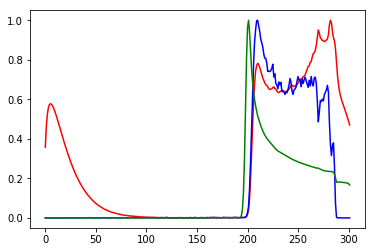

In [19]:
# X 反向
y_predict = model.predict(X[:, ::-1, np.newaxis])
c = np.arange(0, 302)
plt.plot(c, normalize(y_predict[1, :]), 'r')
plt.plot(c, X[1, ::-1], 'b')
plt.plot(c, Y[1, ::-1], 'g')
plt.show()
np.savetxt("y_trans_pred.txt",y_predict[1, :])
np.savetxt("y_trans.txt",X[1, :])
np.savetxt("x_trans.txt",Y[1, :])

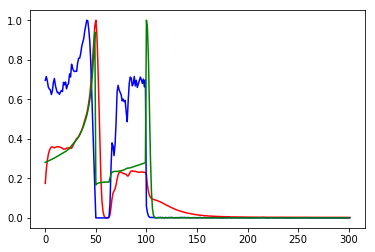

In [12]:
# X 换顺序
x = np.concatenate((X[:, 50:100], X[:, 0:50], X[:, 100:302]), axis=1)
y = np.concatenate((Y[:, 50:100], Y[:, 0:50], Y[:, 100:302]), axis=1)
y_predict = model.predict(x[:, :, np.newaxis])
c = np.arange(0, 302)
plt.plot(c, normalize(y_predict[1, :]), 'r')
plt.plot(c, x[1, :], 'b')
plt.plot(c, y[1, :], 'g')
plt.show()
np.savetxt('y_order_pred.txt', y_predict[1, :])
np.savetxt('x_order.txt', x[1, :])
np.savetxt('y_order.txt', y[1, :])

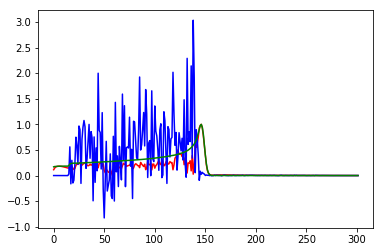

In [7]:
# snr=1
x = add_noise(X, 200, 302, 1)
y = Y
y_predict = model.predict(x[:, :, np.newaxis])
c = np.arange(0, 302)
plt.plot(c, normalize(y_predict[100, :]), 'r')
plt.plot(c, x[100, :], 'b')
plt.plot(c, y[100, :], 'g')
plt.show()
np.savetxt('y_snr_pred.txt', y_predict[100, :])
np.savetxt('x_snr.txt', x[100, :])
np.savetxt('y_snr.txt', y[100, :])

In [6]:
# 
x = np.full((1, 302), 0.5, dtype="float")
x = add_noise(x, 1, 302, 1)
y_predict = model.predict(x[:, :, np.newaxis])
plt.plot(c, y_predict[0, :], 'r')
plt.plot(c, x[0, :], 'b')
plt.show()
np.savetxt('y_1_pred.txt', y_predict[0, :])
np.savetxt('x_1.txt', x[0, :])

NameError: name 'c' is not defined

In [8]:
# 以这个model的预测值作为输出
extract_state_model = Model(
    inputs=model.input,
    outputs=model.get_layer('lstm_1').output
)
h_state = extract_state_model.predict(X[:, :, np.newaxis])

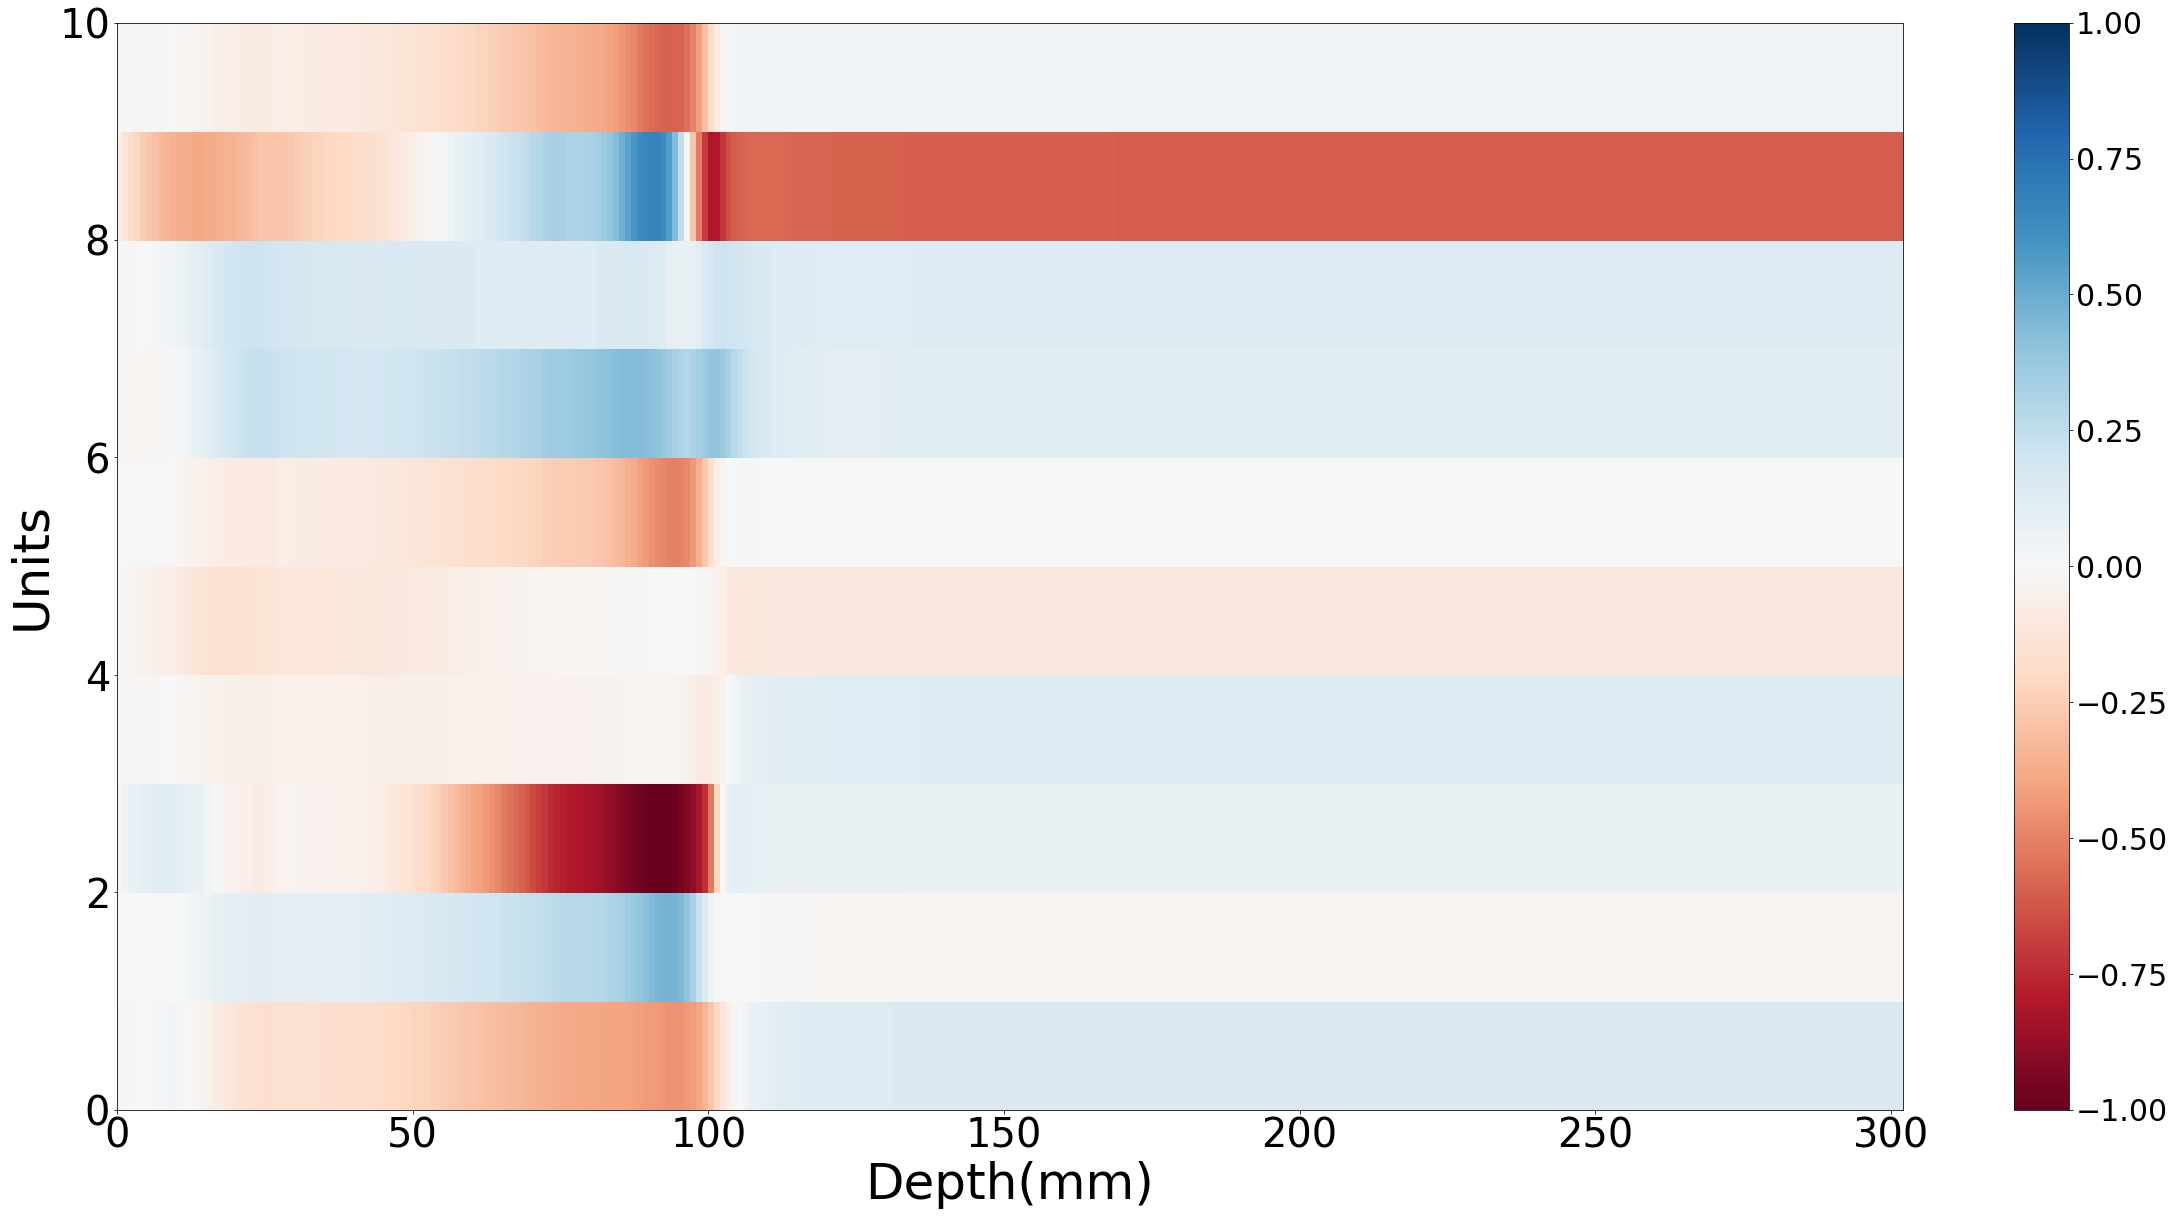

In [10]:
# plot activation
fig, ax = plt.subplots(figsize=(40, 20))
b = np.swapaxes(h_state[14], 0, 1)
c = ax.pcolor(b, cmap='RdBu', vmin=-1, vmax=1)
ax.set_xticklabels([0, 50, 100, 150, 200, 250, 300], fontsize=40) # 坐标轴的刻度
ax.set_yticklabels([0, 2, 4, 6, 8, 10], fontsize=40)
ax.set_xlabel('Depth(mm)', fontsize=50)
ax.set_ylabel('Units', fontsize=50)
#ax0.set_title('default: no edges')
#fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
e = fig.colorbar(c, ax=ax)
e.ax.tick_params(labelsize=30)  # 调整 coloebar 字体的
# 带网格线的
# c = ax[1].pcolor(b, edgecolors='k', linewidths=1)
# ax1.set_title('thick edges')
#fig.tight_layout()
plt.show()
